# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error as mse
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet,
    BayesianRidge, PoissonRegressor, GammaRegressor,
    TheilSenRegressor, HuberRegressor, RANSACRegressor
)
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings('ignore') # For cleaner outputs

# Defining Custom Functions

In [2]:
# Function to plot correlation heatmap
def plot_corr_heatmap(data, method='pearson'):
    plt.figure(figsize=(8,8))
    sns.heatmap(data.corr(method), annot=False, cmap='YlGnBu' )
    plt.title(f'{method.capitalize()} Correlation')

# Function to fit and evaluate regression models
def fit_and_evaluate_model(model, features_train, target_train, features_test, target_test):
    model.fit(features_train, target_train)
    pred = model.predict(features_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"Coefficients: {getattr(model, 'coef_', 'N/A')}")
    print(f"r2_score: {r2_score(pred, target_test)}\n")
    return pred


# Reading Data

In [3]:
# Load dataset
data = pd.read_csv('s_data.csv')
data.drop(columns="date", inplace=True)

# Data Cleaning

In [4]:
data

at           ap         rh         t1    tw         t2
0   18.000000  1022.800000  73.100000  31.210000  15.0  24.110000
1   13.000000  1020.200000  77.000000  31.050000  11.0  22.500000
2   19.000000  1022.400000  66.300000  32.090000  15.0  23.740000
3   30.000000  1009.200000  51.100000  35.060000  23.0  28.170000
4   41.000000   992.200000  22.300000  35.240000  25.0  28.250000
5   40.000000   988.900000  34.500000  37.760000  27.0  30.640000
6   34.830000   989.100000  50.460000  38.900000  26.0  31.730000
7   33.820000   983.440000  50.700000  41.050000  30.0  33.820000
8   38.580000   976.370000  39.890000  40.210000  28.0  33.480000
9   36.270000   981.818687  57.030000  39.920000  29.0  32.420000
10  32.293239   988.106824  35.057345  35.330699  24.0  28.420259

array([[<Axes: title={'center': 'at'}>, <Axes: title={'center': 'ap'}>],
       [<Axes: title={'center': 'rh'}>, <Axes: title={'center': 't1'}>],
       [<Axes: title={'center': 'tw'}>, <Axes: title={'center': 't2'}>]],
      dtype=object)

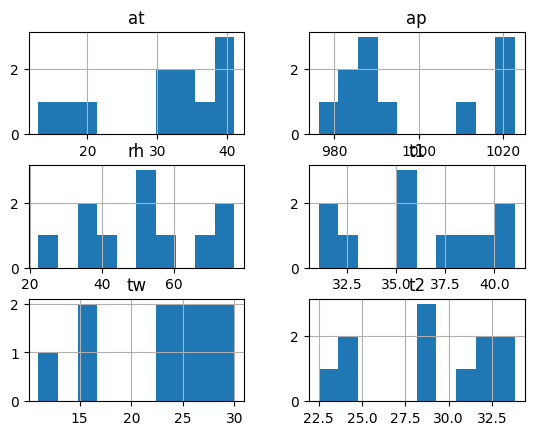

In [5]:
data.hist()

In [6]:
data.info()
# no missing or dublicate values detected.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   at      11 non-null     float64
 1   ap      11 non-null     float64
 2   rh      11 non-null     float64
 3   t1      11 non-null     float64
 4   tw      11 non-null     float64
 5   t2      11 non-null     float64
dtypes: float64(6)
memory usage: 660.0 bytes


# EDA

numerical analysis

In [7]:
data.describe()

at           ap         rh         t1         tw         t2
count  11.000000    11.000000  11.000000  11.000000  11.000000  11.000000
mean   30.617567   997.685046  50.676122  36.165518  23.000000  28.843660
std     9.627639    17.500883  17.051800   3.666648   6.418723   4.003624
min    13.000000   976.370000  22.300000  31.050000  11.000000  22.500000
25%    24.500000   985.773412  37.473673  33.575000  19.000000  26.140000
50%    33.820000   989.100000  50.700000  35.330699  25.000000  28.420259
75%    37.425000  1014.700000  61.665000  39.410000  27.500000  32.075000
max    41.000000  1022.800000  77.000000  41.050000  30.000000  33.820000

Scatter matrix plot

array([[<Axes: xlabel='at', ylabel='at'>,
        <Axes: xlabel='ap', ylabel='at'>,
        <Axes: xlabel='rh', ylabel='at'>,
        <Axes: xlabel='t1', ylabel='at'>,
        <Axes: xlabel='tw', ylabel='at'>,
        <Axes: xlabel='t2', ylabel='at'>],
       [<Axes: xlabel='at', ylabel='ap'>,
        <Axes: xlabel='ap', ylabel='ap'>,
        <Axes: xlabel='rh', ylabel='ap'>,
        <Axes: xlabel='t1', ylabel='ap'>,
        <Axes: xlabel='tw', ylabel='ap'>,
        <Axes: xlabel='t2', ylabel='ap'>],
       [<Axes: xlabel='at', ylabel='rh'>,
        <Axes: xlabel='ap', ylabel='rh'>,
        <Axes: xlabel='rh', ylabel='rh'>,
        <Axes: xlabel='t1', ylabel='rh'>,
        <Axes: xlabel='tw', ylabel='rh'>,
        <Axes: xlabel='t2', ylabel='rh'>],
       [<Axes: xlabel='at', ylabel='t1'>,
        <Axes: xlabel='ap', ylabel='t1'>,
        <Axes: xlabel='rh', ylabel='t1'>,
        <Axes: xlabel='t1', ylabel='t1'>,
        <Axes: xlabel='tw', ylabel='t1'>,
        <Axes: xlabel='t2', yla

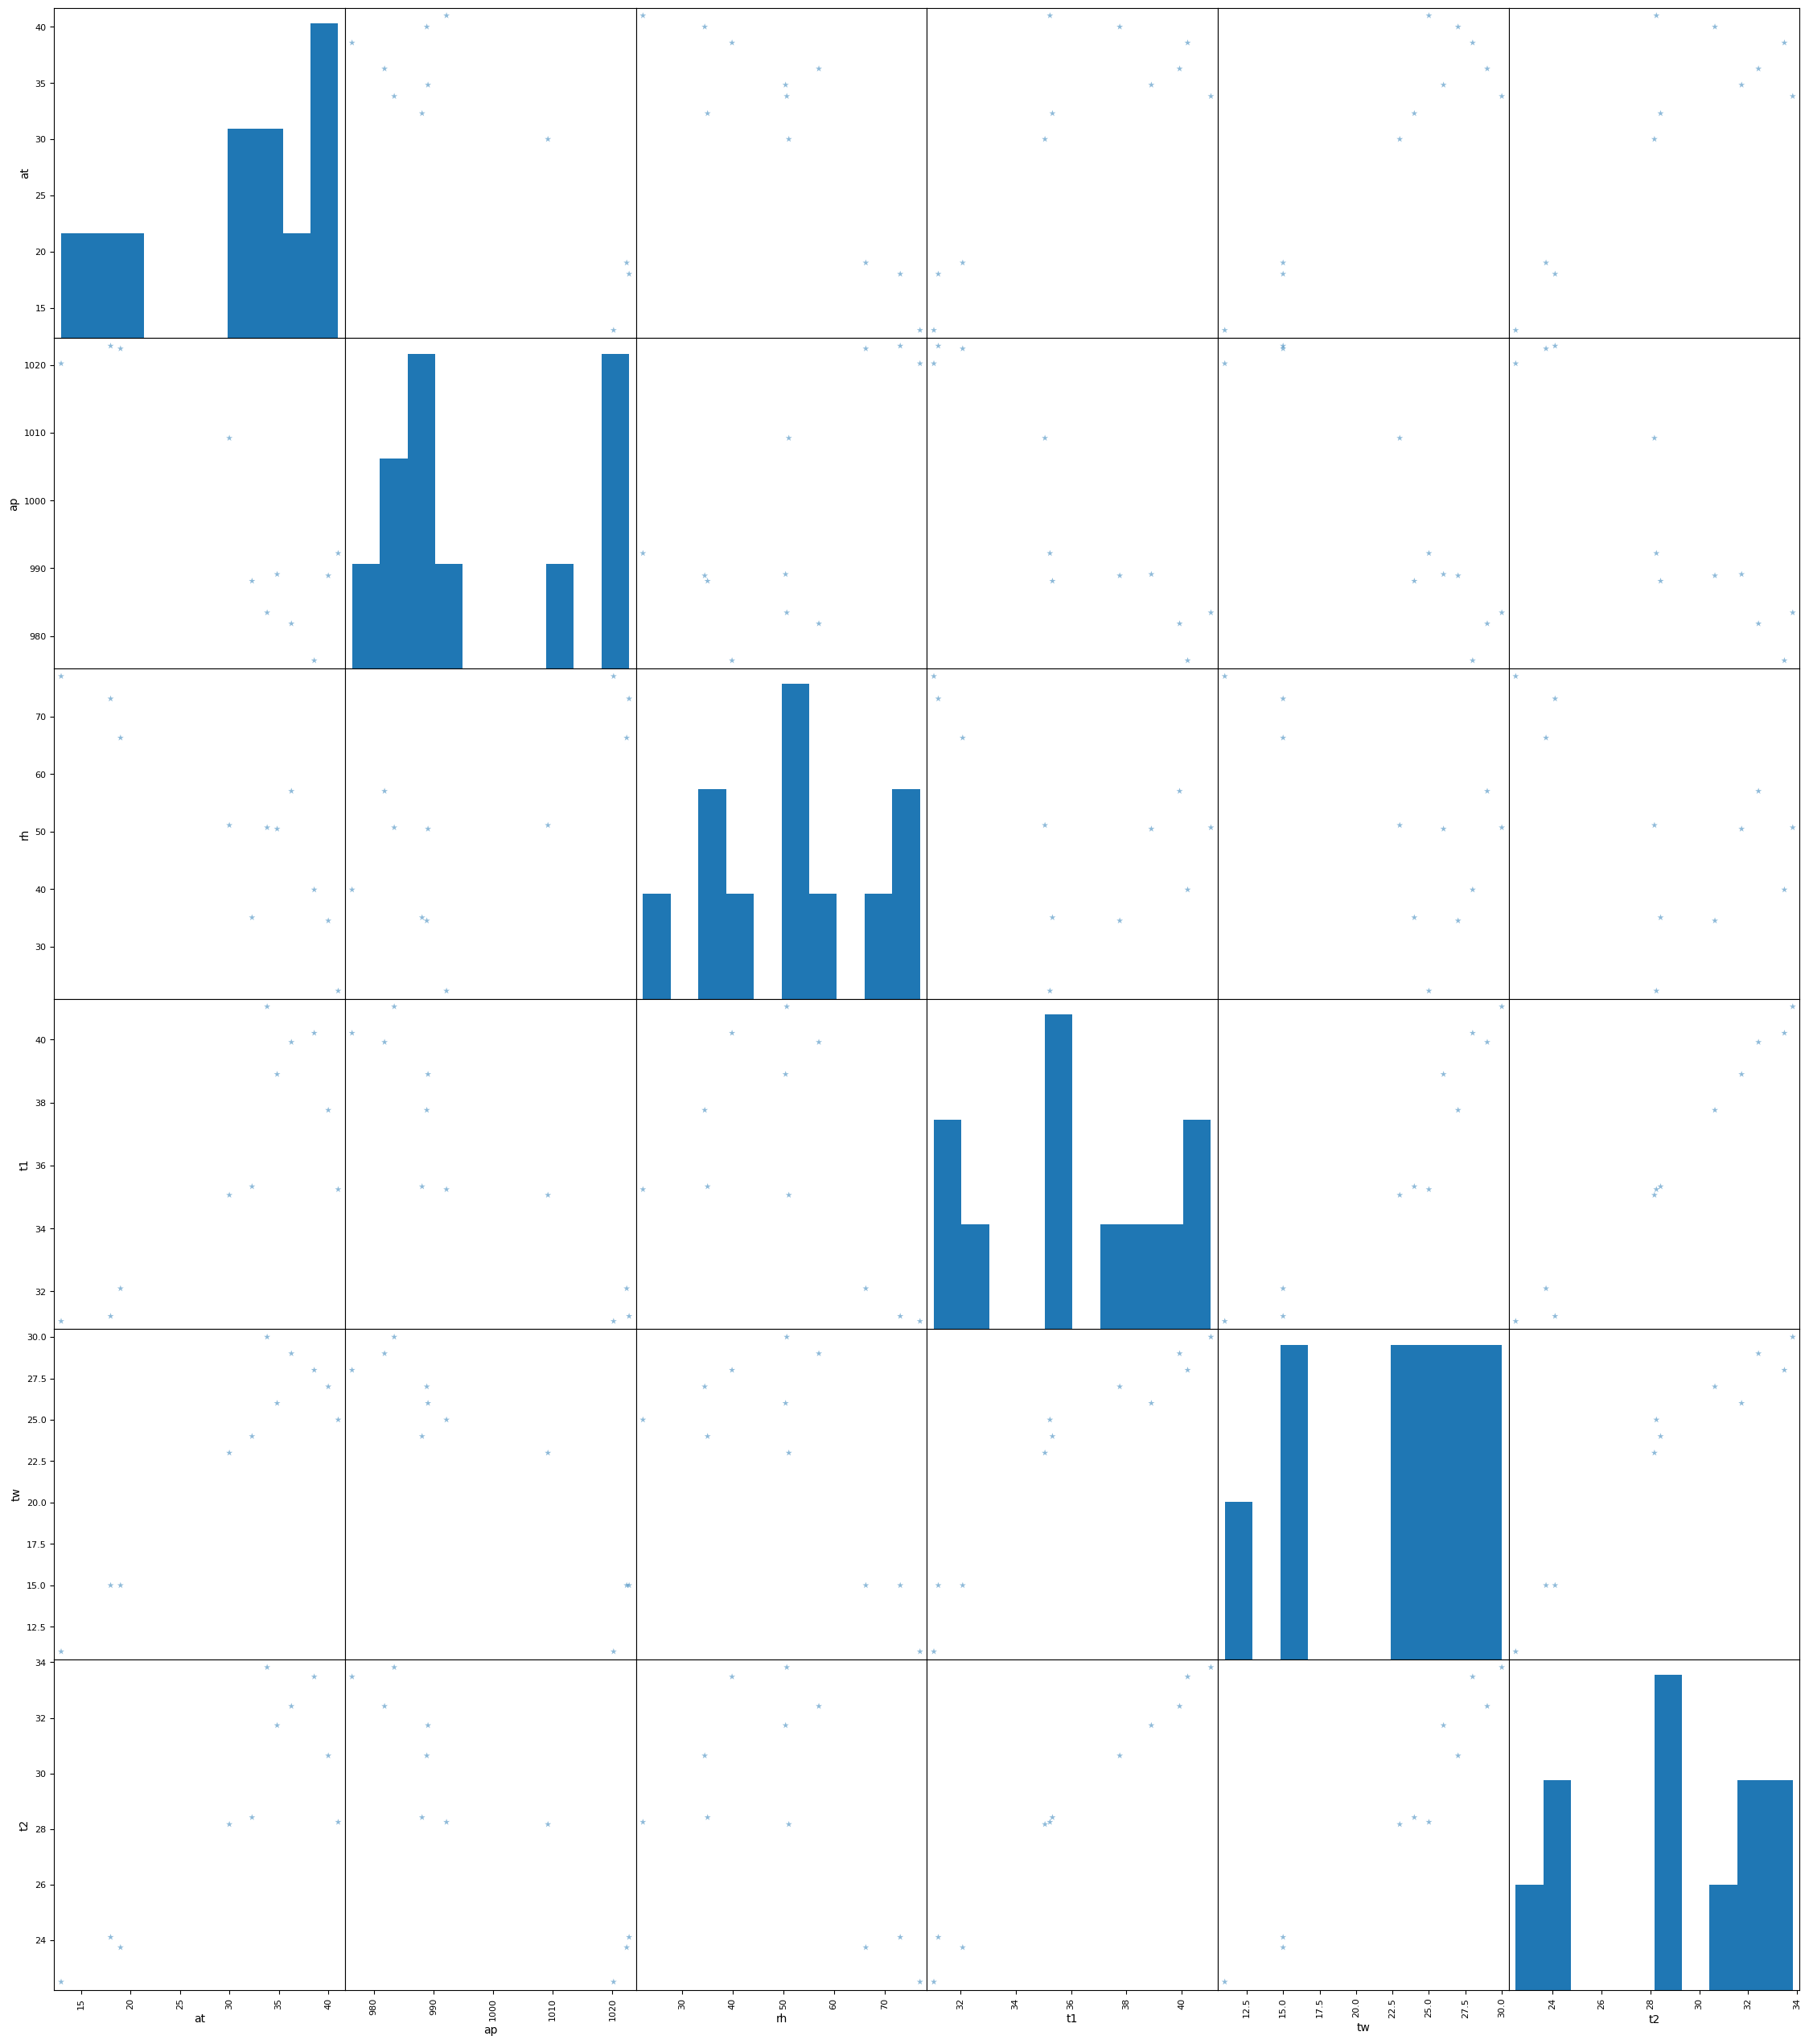

In [8]:
pd.plotting.scatter_matrix(data, figsize=(28, 32), marker="*")

Correlation heatmaps

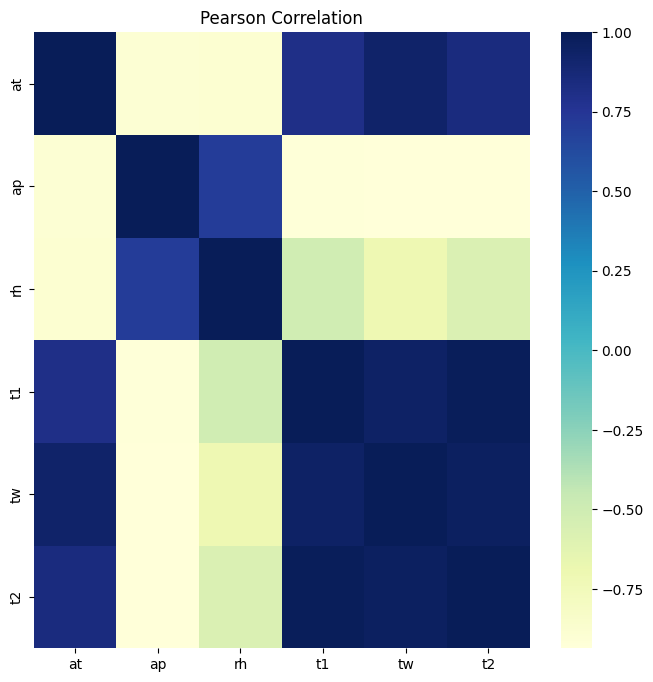

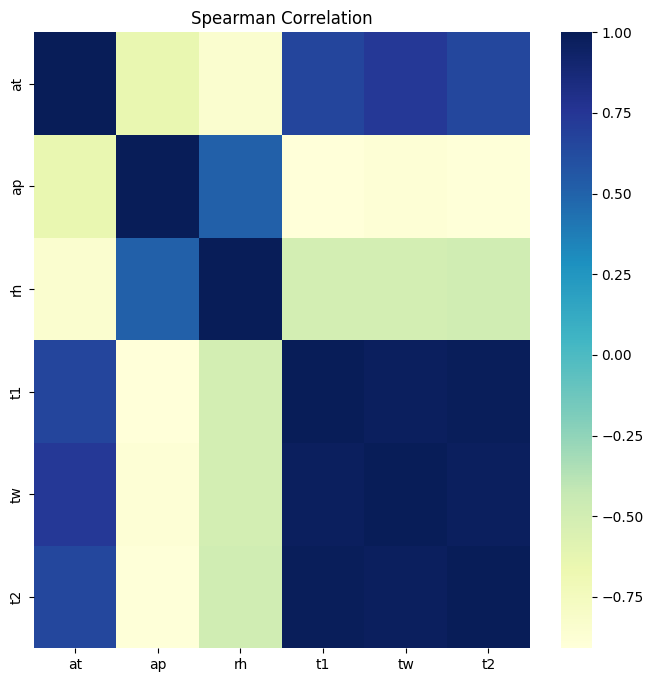

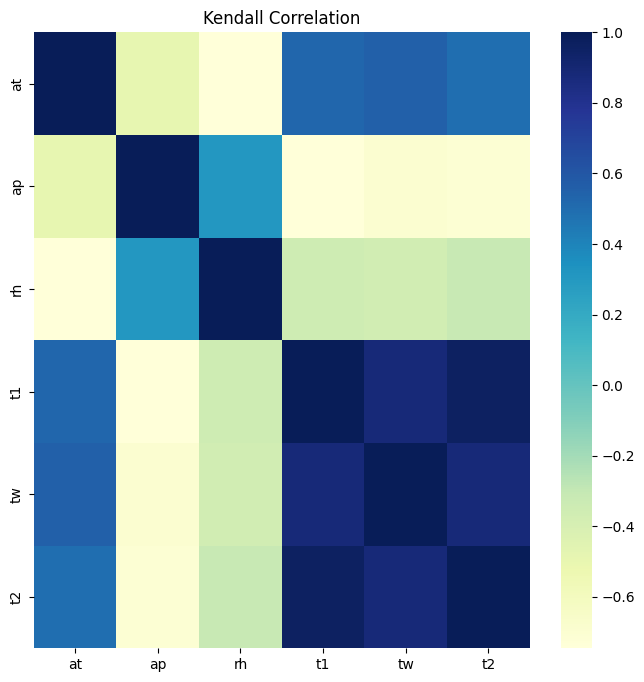

In [9]:
plot_corr_heatmap(data, method='pearson')
plot_corr_heatmap(data, method='spearman')
plot_corr_heatmap(data, method='kendall')

# Model Training

Split data into features and target

In [10]:
features = data.drop(columns='t2')
target = data.t2

Model selection

In [11]:
features

at           ap         rh         t1    tw
0   18.000000  1022.800000  73.100000  31.210000  15.0
1   13.000000  1020.200000  77.000000  31.050000  11.0
2   19.000000  1022.400000  66.300000  32.090000  15.0
3   30.000000  1009.200000  51.100000  35.060000  23.0
4   41.000000   992.200000  22.300000  35.240000  25.0
5   40.000000   988.900000  34.500000  37.760000  27.0
6   34.830000   989.100000  50.460000  38.900000  26.0
7   33.820000   983.440000  50.700000  41.050000  30.0
8   38.580000   976.370000  39.890000  40.210000  28.0
9   36.270000   981.818687  57.030000  39.920000  29.0
10  32.293239   988.106824  35.057345  35.330699  24.0

In [12]:
# List of regression models
models = [
    LinearRegression(), Ridge(alpha=1.0), Lasso(alpha=1.0),
    ElasticNet(alpha=1.0, l1_ratio=0.5), SVR(kernel='linear', C=1.0),
    DecisionTreeRegressor(), RandomForestRegressor(n_estimators=100),
    GradientBoostingRegressor(n_estimators=100), BayesianRidge(),
    PoissonRegressor(), GammaRegressor(), KernelRidge(),
    PLSRegression(n_components=1), TheilSenRegressor(),
    HuberRegressor(epsilon=1.35), RANSACRegressor(),
    MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000),
]

# Fit models and print coefficients
for model in models:
    fit_and_evaluate_model(model, features, target, features, target)

Model: LinearRegression
Coefficients: [-7.86784542e-03 -4.20034806e-03 -7.61500816e-04  7.80772188e-01
  1.80439237e-01]
r2_score: 0.9919068483176213

Model: Ridge
Coefficients: [ 0.00401697 -0.01953681  0.01348859  0.63800272  0.22802611]
r2_score: 0.9913512855876209

Model: Lasso
Coefficients: [ 0.         -0.11854078  0.04551394  0.          0.35938334]
r2_score: 0.9642931077798313

Model: ElasticNet
Coefficients: [ 0.00272762 -0.09138236  0.03904603  0.1848481   0.32200479]
r2_score: 0.9775285091772544

Model: SVR
Coefficients: [[ 0.01855934 -0.01986538  0.03720121  0.46456468  0.33930363]]
r2_score: 0.9879976059277847

Model: DecisionTreeRegressor
Coefficients: N/A
r2_score: 1.0

Model: RandomForestRegressor
Coefficients: N/A
r2_score: 0.9875376089835199

Model: GradientBoostingRegressor
Coefficients: N/A
r2_score: 0.9999999988880346

Model: BayesianRidge
Coefficients: [ 0.0312734  -0.04345991  0.03525571  0.44407708  0.27251783]
r2_score: 0.9887442215686189

Model: PoissonRegress

GradientBoostingRegressor

In [13]:
# GradientBoostingRegressor
model = GradientBoostingRegressor()
pred = fit_and_evaluate_model(model, features, target, features, target)
print(f"MSE: {mse(pred, target)}")

Model: GradientBoostingRegressor
Coefficients: N/A
r2_score: 0.9999999988880346

MSE: 1.6202397390728552e-08


Plot actual vs predicted

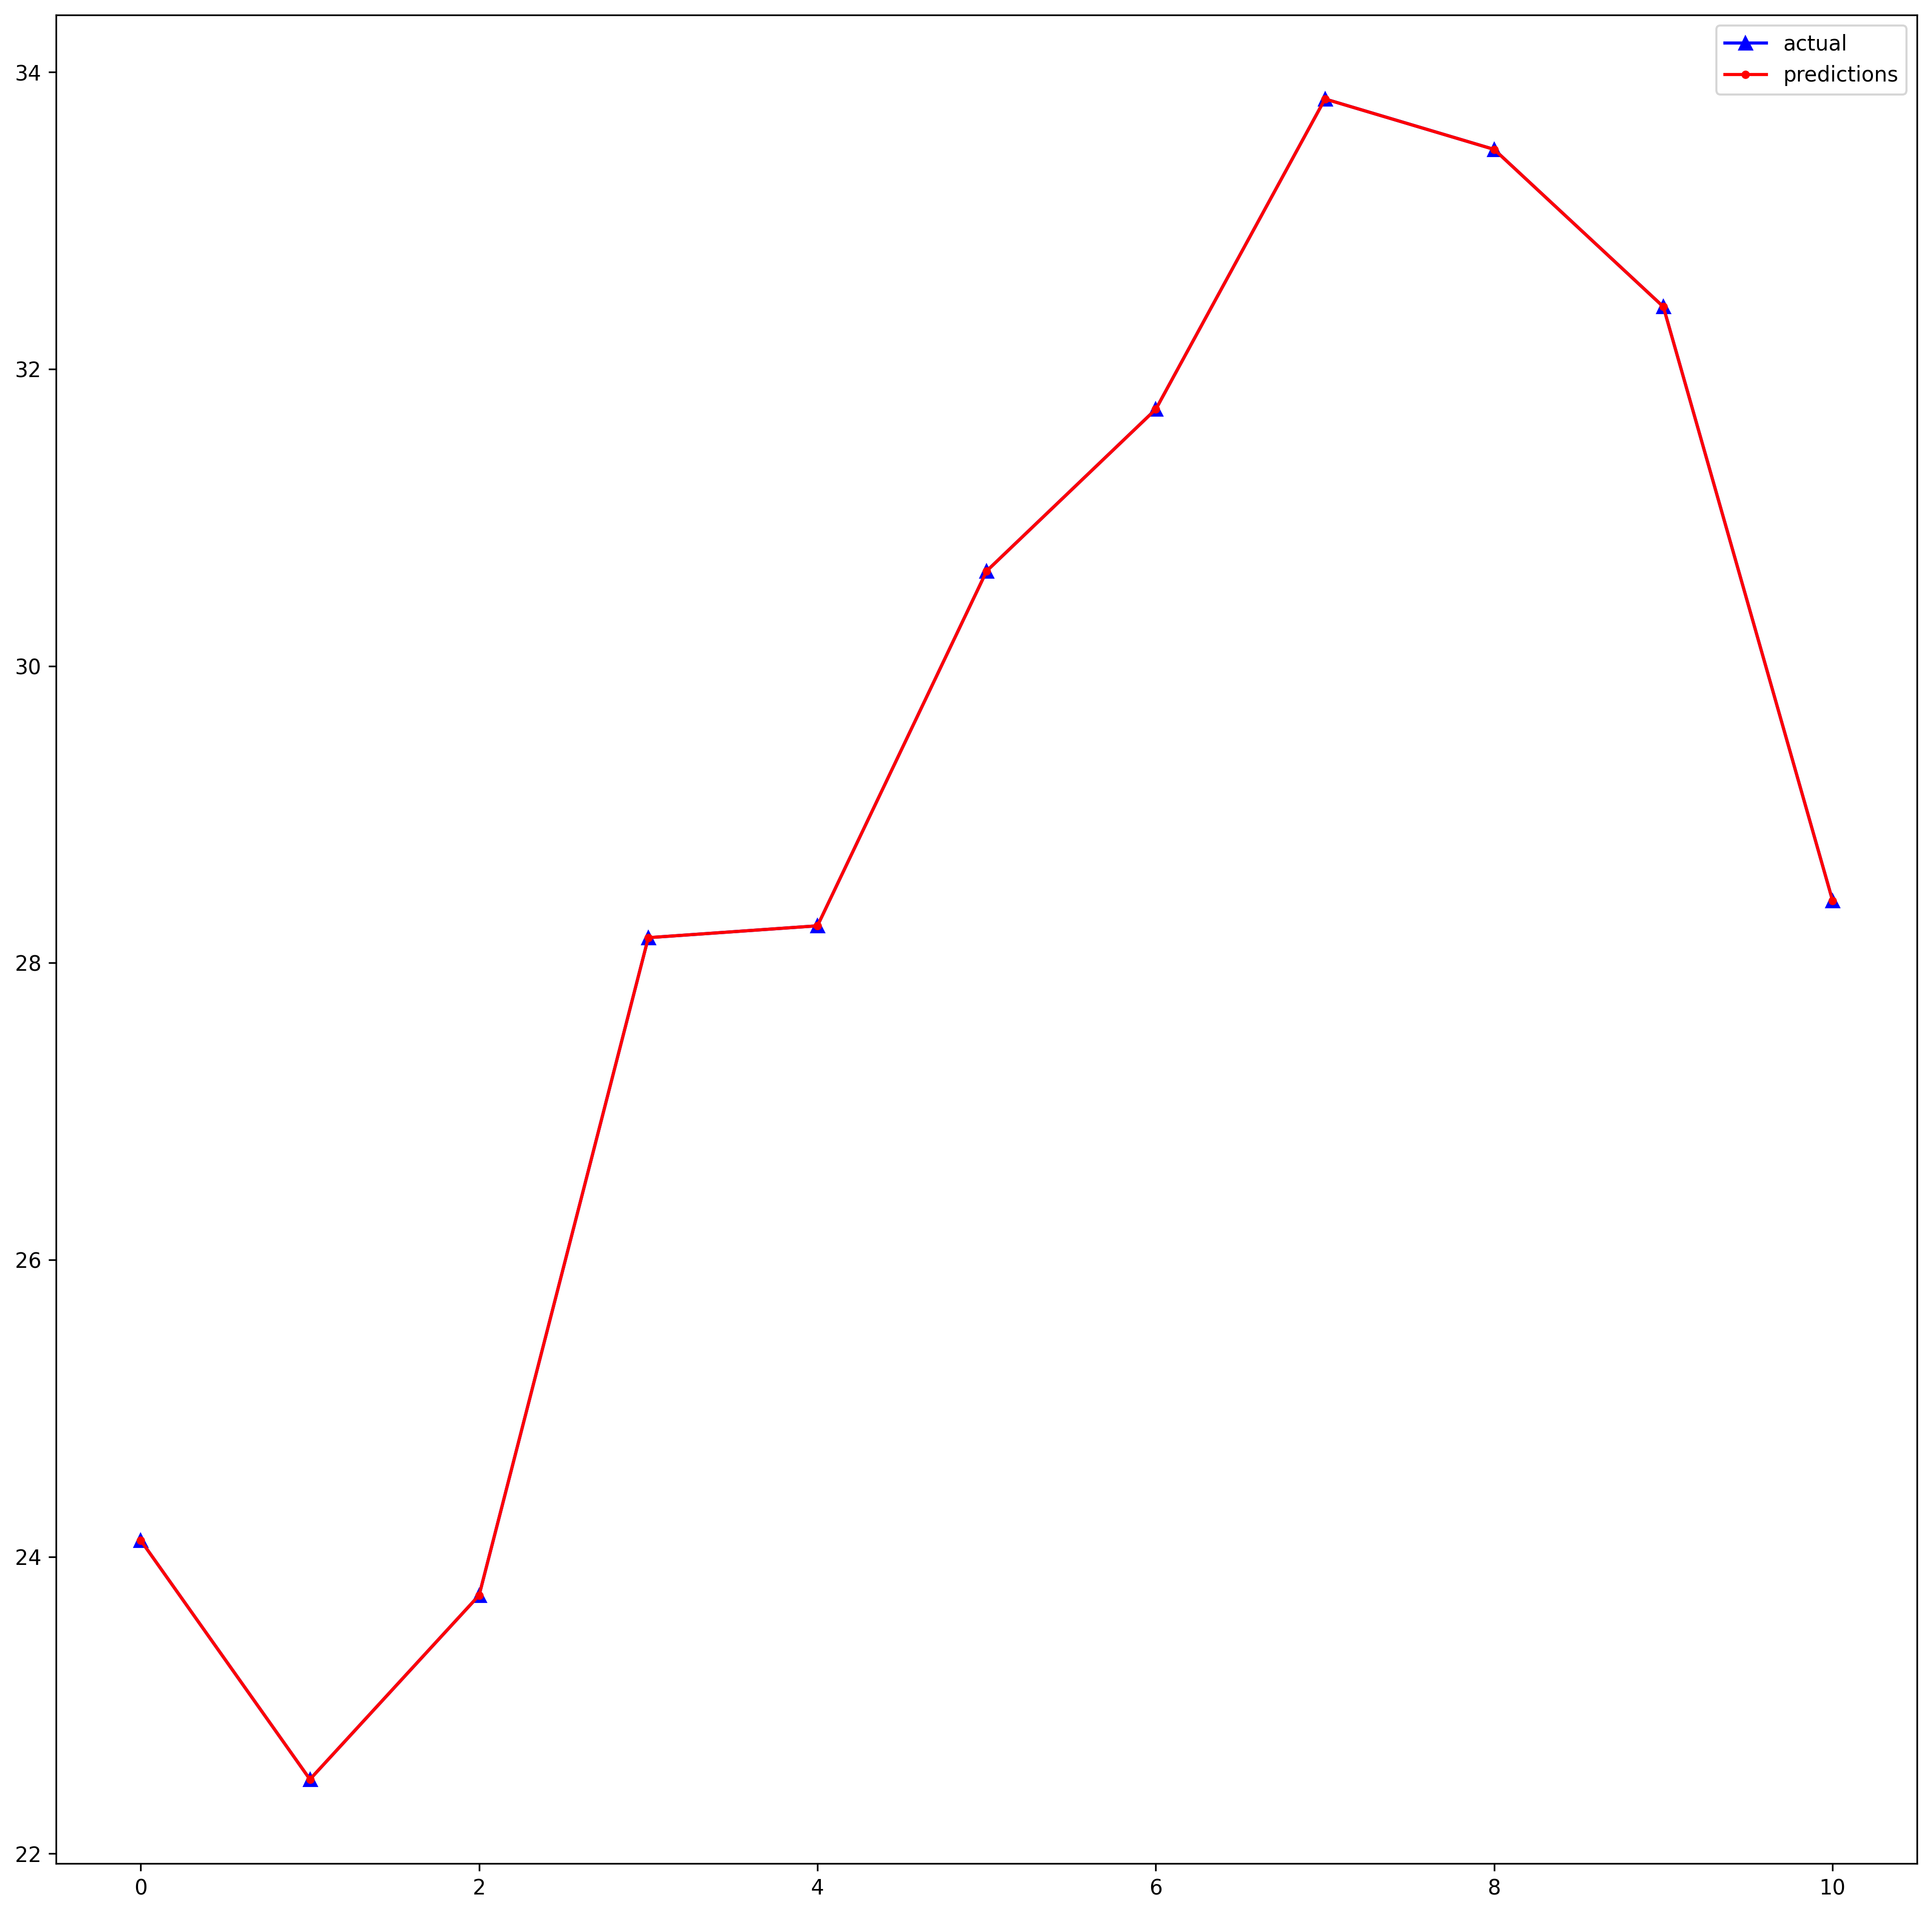

In [14]:
plt.figure(figsize=(16,16),dpi=300)
plt.plot(list(range(len(target))), target, color='blue', label='actual', marker='^')
plt.plot(list(range(len(target))), pred, color='red', label='predictions', marker='.')
plt.legend()
plt.show()

# Synthetic Data Generation using Gaussian Noise

In [15]:
sigma = 0.1 * data.std()
df_noisy = pd.DataFrame(columns=data.columns)
while len(df_noisy) < 250:
    noise = np.random.normal(0, sigma, data.shape)
    noisy_data = data + noise
    df_noisy = pd.concat([df_noisy, noisy_data])

Train-Test split

In [16]:
# Split noisy data into train and test sets
noisy = shuffle(df_noisy)
noisy.reset_index(inplace=True)
noisy.drop(columns='index',inplace=True)
train = noisy[:200]
test = noisy[200:]
features_train = train.drop(columns='t2')
target_train = train.t2
features_test = test.drop(columns='t2')
target_test = test.t2

In [17]:
noisy

at           ap         rh         t1         tw         t2
0    32.999623   987.231322  35.501102  35.706846  24.163361  28.594276
1    36.229871   982.697848  58.522311  40.218766  29.053369  32.682844
2    40.352391   989.094048  36.020283  37.779365  27.168038  30.485636
3    32.204630   981.303245  50.022770  40.901873  30.036064  34.580090
4    33.442144   986.534961  33.737244  35.292773  22.988475  28.397761
..         ...          ...        ...        ...        ...        ...
248  37.397919   973.156851  39.972482  40.286364  29.109559  34.245578
249  41.443379   992.416891  23.932438  35.437145  25.550573  27.661087
250  34.726605   990.131437  48.489895  38.535728  25.397087  32.155540
251  29.511583  1009.029951  51.547210  35.087151  22.372250  27.989490
252  36.102045   984.172138  55.207628  39.876060  29.805465  32.118250

[253 rows x 6 columns]

In [18]:
noisy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   at      253 non-null    float64
 1   ap      253 non-null    float64
 2   rh      253 non-null    float64
 3   t1      253 non-null    float64
 4   tw      253 non-null    float64
 5   t2      253 non-null    float64
dtypes: float64(6)
memory usage: 12.0 KB


# Synthetic Data EDA

In [19]:
noisy.describe()

at           ap          rh          t1          tw          t2
count  253.000000   253.000000  253.000000  253.000000  253.000000  253.000000
mean    30.652654   997.777192   50.574440   36.135583   23.004273   28.839387
std      9.267037    16.898848   16.328746    3.491362    6.200219    3.893353
min     11.234358   973.156851   18.448795   30.293542    9.611958   21.675558
25%     19.965024   985.355808   36.150609   32.290235   15.741045   24.425874
50%     33.428184   990.025409   50.241465   35.689037   25.051245   28.594276
75%     37.719828  1019.288160   64.829305   39.540556   27.819006   32.267637
max     42.869207  1027.390177   79.635333   41.527660   31.683529   35.009213

Text(0.5, 1.0, 'Pearson Orginal')

<Figure size 1920x1440 with 0 Axes>

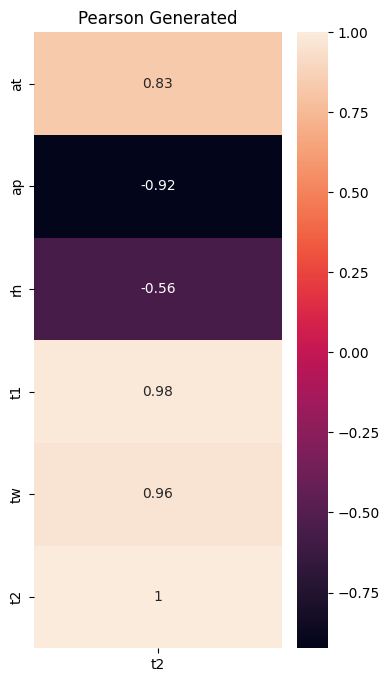

<Figure size 1920x1440 with 0 Axes>

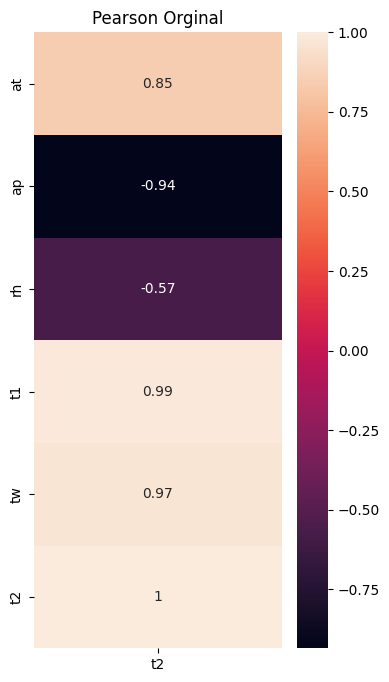

In [20]:
plt.figure(dpi=300)
plt.figure(figsize=(4, 8))
sns.heatmap(df_noisy.corr()['t2'].to_frame(),annot=True)
plt.title('Pearson Generated')  # Adding the title
plt.figure(dpi=300)
plt.figure(figsize=(4, 8))
sns.heatmap(data.corr()['t2'].to_frame(),annot=True)
plt.title('Pearson Orginal')  # Adding the title

In [21]:
df_noisy.corr().to_csv('corr.csv')

# Model Training Synthethic data

Model Training

In [22]:
models = [
    LinearRegression(), Ridge(alpha=1.0), Lasso(alpha=1.0),
    ElasticNet(alpha=1.0, l1_ratio=0.5), SVR(kernel='linear', C=1.0),
    DecisionTreeRegressor(), RandomForestRegressor(n_estimators=100),
    GradientBoostingRegressor(n_estimators=100), BayesianRidge(),
    PoissonRegressor(), GammaRegressor(), KernelRidge(),
    PLSRegression(n_components=1), TheilSenRegressor(),
    HuberRegressor(epsilon=1.35), RANSACRegressor(),
    MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000),
    AdaBoostRegressor(),
    CatBoostRegressor(verbose=False)
]

# Fit models and print coefficients
for model in models:
    print(mse(fit_and_evaluate_model(model, features_train, target_train, features_test, target_test), target_test))

Model: LinearRegression
Coefficients: [-0.00146123 -0.01589793  0.01372139  0.73073248  0.20353624]
r2_score: 0.9744153277613591

0.39840470276348094
Model: Ridge
Coefficients: [-0.00082312 -0.01651557  0.01430626  0.72484105  0.20527353]
r2_score: 0.9744384687039641

0.39787590229791264
Model: Lasso
Coefficients: [ 0.         -0.11674518  0.04859434  0.0243014   0.35587055]
r2_score: 0.9490003492018364

0.6926119233412548
Model: ElasticNet
Coefficients: [ 0.0187418  -0.08584297  0.04374909  0.25708922  0.28674679]
r2_score: 0.9643019357941433

0.5096604463581075
Model: SVR
Coefficients: [[ 5.46456093e-04 -2.07782862e-02  1.57557537e-02  7.31673055e-01
   1.93923578e-01]]
r2_score: 0.9745323867349704

0.40071030503390104
Model: DecisionTreeRegressor
Coefficients: N/A
r2_score: 0.9624348704610896

0.6240245869520369
Model: RandomForestRegressor
Coefficients: N/A
r2_score: 0.9816451037390623

0.2935721618107387
Model: GradientBoostingRegressor
Coefficients: N/A
r2_score: 0.97931706919058

In [23]:
# Fit and evaluate GradientBoostingRegressor on noisy data
model = GradientBoostingRegressor()
pred = fit_and_evaluate_model(model, features_train, target_train, features_test, target_test)
print(f"MSE on Noisy Data: {mse(pred, target_test)}")

Model: GradientBoostingRegressor
Coefficients: N/A
r2_score: 0.9794394326528543

MSE on Noisy Data: 0.32545361016558266


In [24]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = GradientBoostingRegressor(), X = features_train, y= target_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())

The mean accuracy is:  0.9838006776840512


loss curve

<Figure size 1600x1200 with 0 Axes>

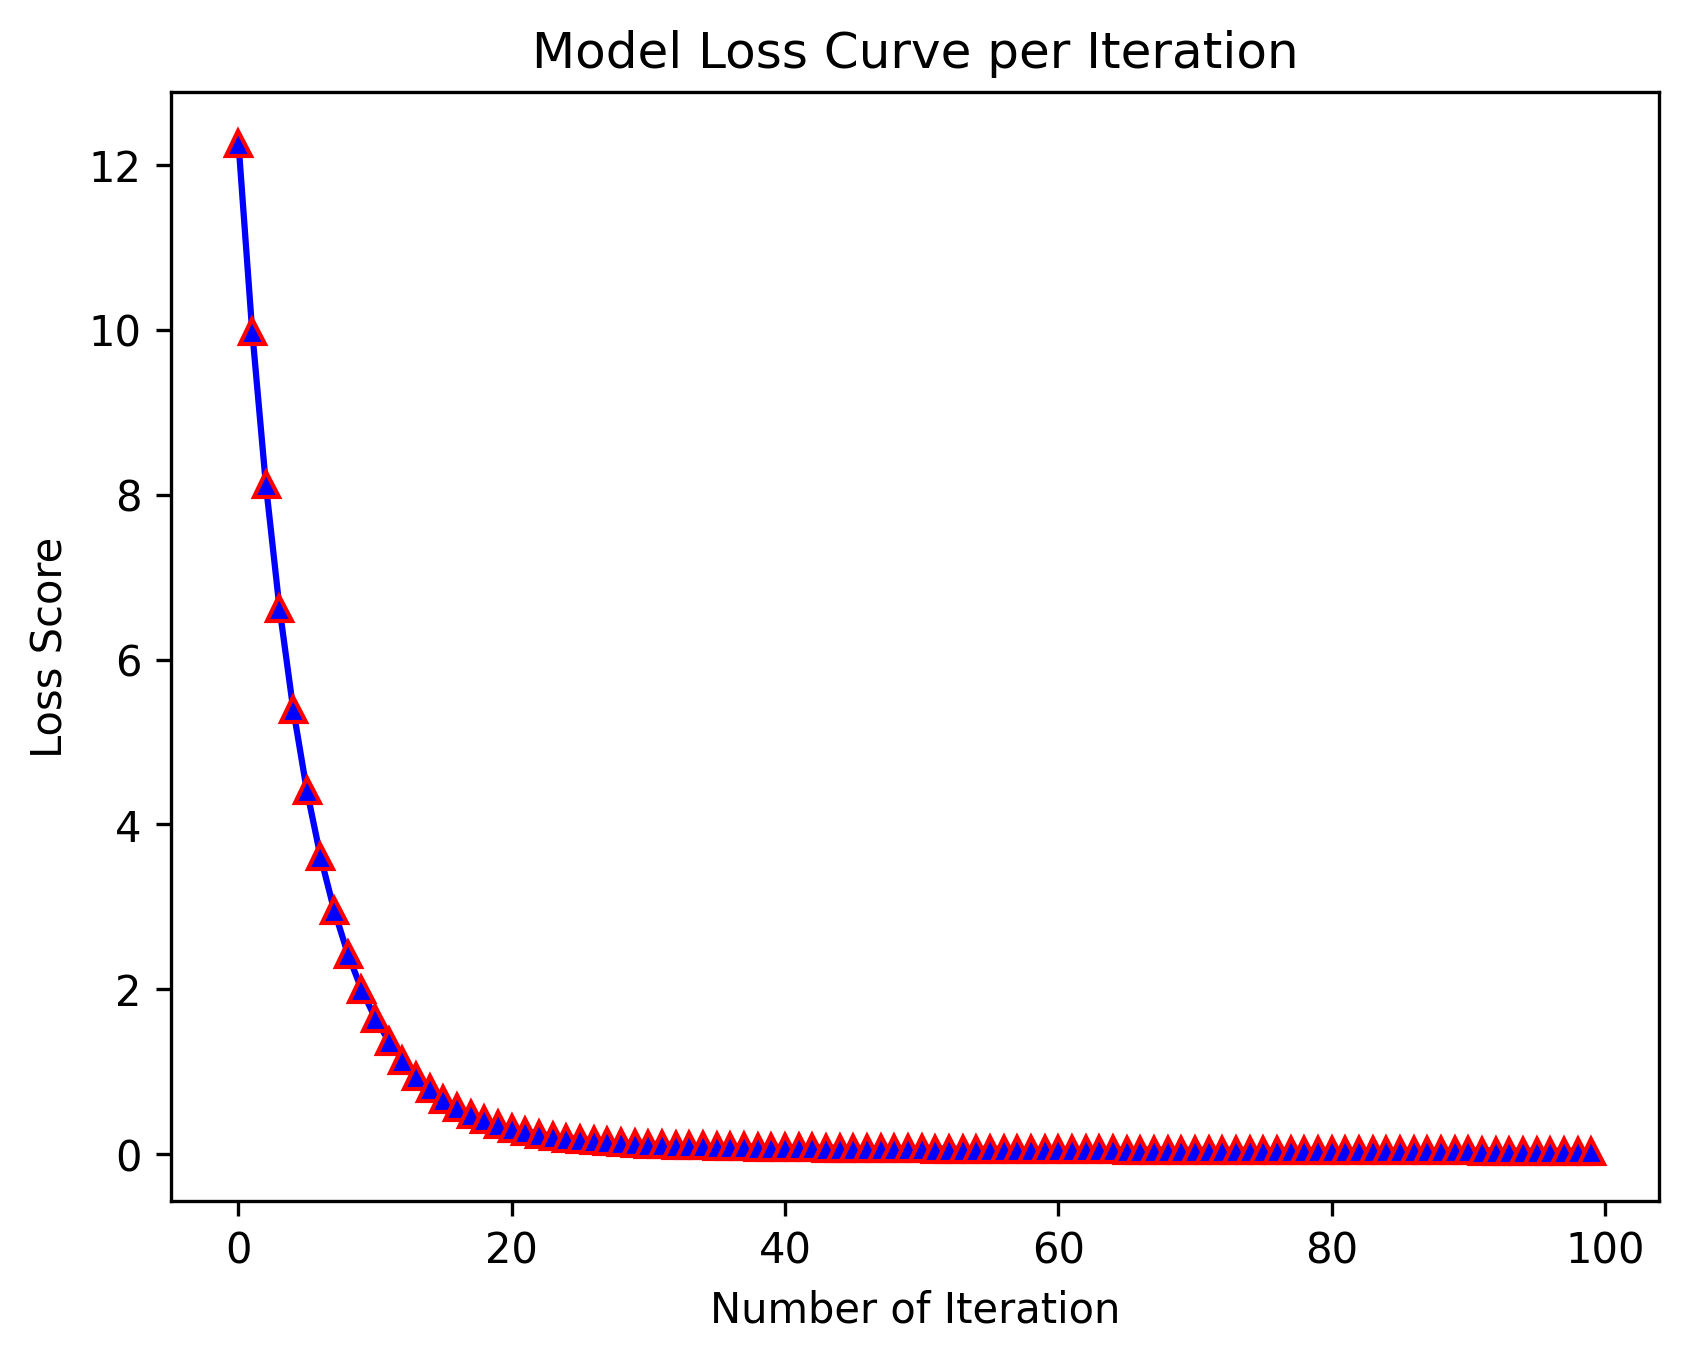

In [25]:
plt.figure(figsize=(16, 12))
plt.figure(dpi=300)
plt.plot(model.train_score_, color='blue', marker='^', markeredgecolor='red')
plt.xlabel("Number of Iteration")
plt.ylabel('Loss Score')
plt.title('Model Loss Curve per Iteration')
plt.show()

In [26]:
pred.tofile('predictions.csv')

Actual vs Predicted Plot

<Figure size 2500x1200 with 0 Axes>

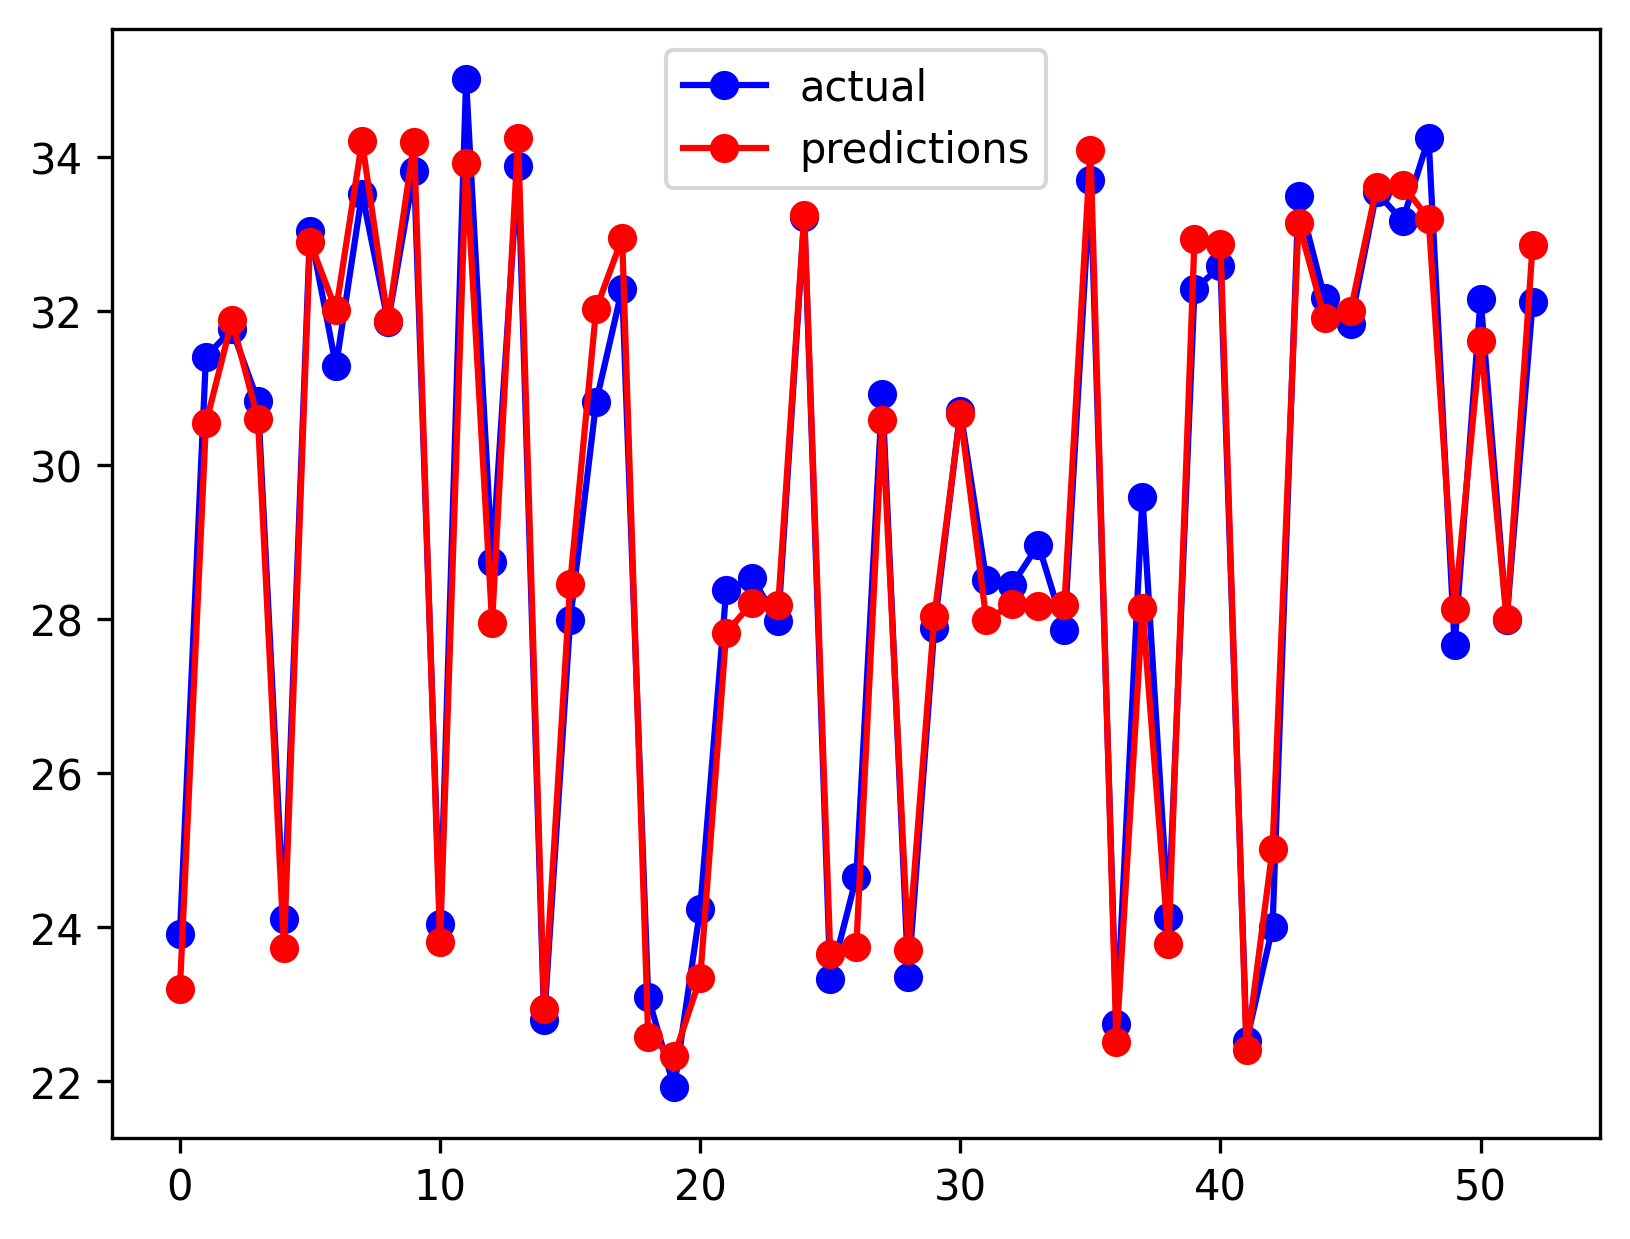

In [27]:
plt.figure(figsize=(25,12))
plt.figure(dpi=300)
plt.plot(list(range(len(target_test))),target_test,color='blue',label='actual', marker='o')
plt.plot(list(range(len(pred))),pred,color='red',label='predictions', marker='o')
plt.legend()

Feature importances

In [28]:
weights = model.feature_importances_
print(weights)

[0.20388133 0.1292536  0.07916785 0.57243958 0.01525764]


In [29]:
labels={'at':"Ambient Temperature (C)",'ap':"Ambient Pressure (KPa)",'rh':'Relative Humidity (%)','t1':'Inlet Temperature (C)','tw':'Wet Bulb Temperature','t2':"Outlet Temperature (C)"}

In [30]:
print("The training R2 is: ", model.score(features_train, target_train))
print("The test R2 is: ", model.score(features_test, target_test))

The training R2 is:  0.9972083642109244
The test R2 is:  0.9784315132575729


Smooth Plotting

In [31]:
# Apply exponential smoothing
window_size = 5
alpha = 0.4
smoothed_data = noisy.copy()
for col in data.columns:
    smoothed_data[col] = noisy[col].ewm(alpha=alpha, adjust=False).mean()

Original Features Vs Target Plot

In [32]:
columns_to_plot = noisy.columns[:-1]
num_plots = len(columns_to_plot)
num_cols = 3
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 15),dpi=600)  # Creating subplots

for idx, cols in enumerate(columns_to_plot):
    row = idx // num_cols
    col = idx % num_cols
    dff = noisy.sort_values(by=cols)
    
    # Perform linear regression
    coefficients = np.polyfit(noisy[cols], noisy['t2'], 1)
    trend_line = np.poly1d(coefficients)
    
    # Plotting on the respective subplot
    axes[row, col].plot(noisy[cols], trend_line(noisy[cols]), color='aquamarine')
    axes[row, col].scatter(dff[cols], dff['t2'], color='blueviolet', marker='o')
    axes[row, col].set_title(f"{labels[cols]} vs {labels['t2']}")
    axes[row, col].set_xlabel(labels[cols])
    axes[row, col].set_ylabel(labels['t2'])
for i in range(num_plots, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()  # Adjusts spacing between subplots
plt.show()

Smooth Features Vs Target Plot

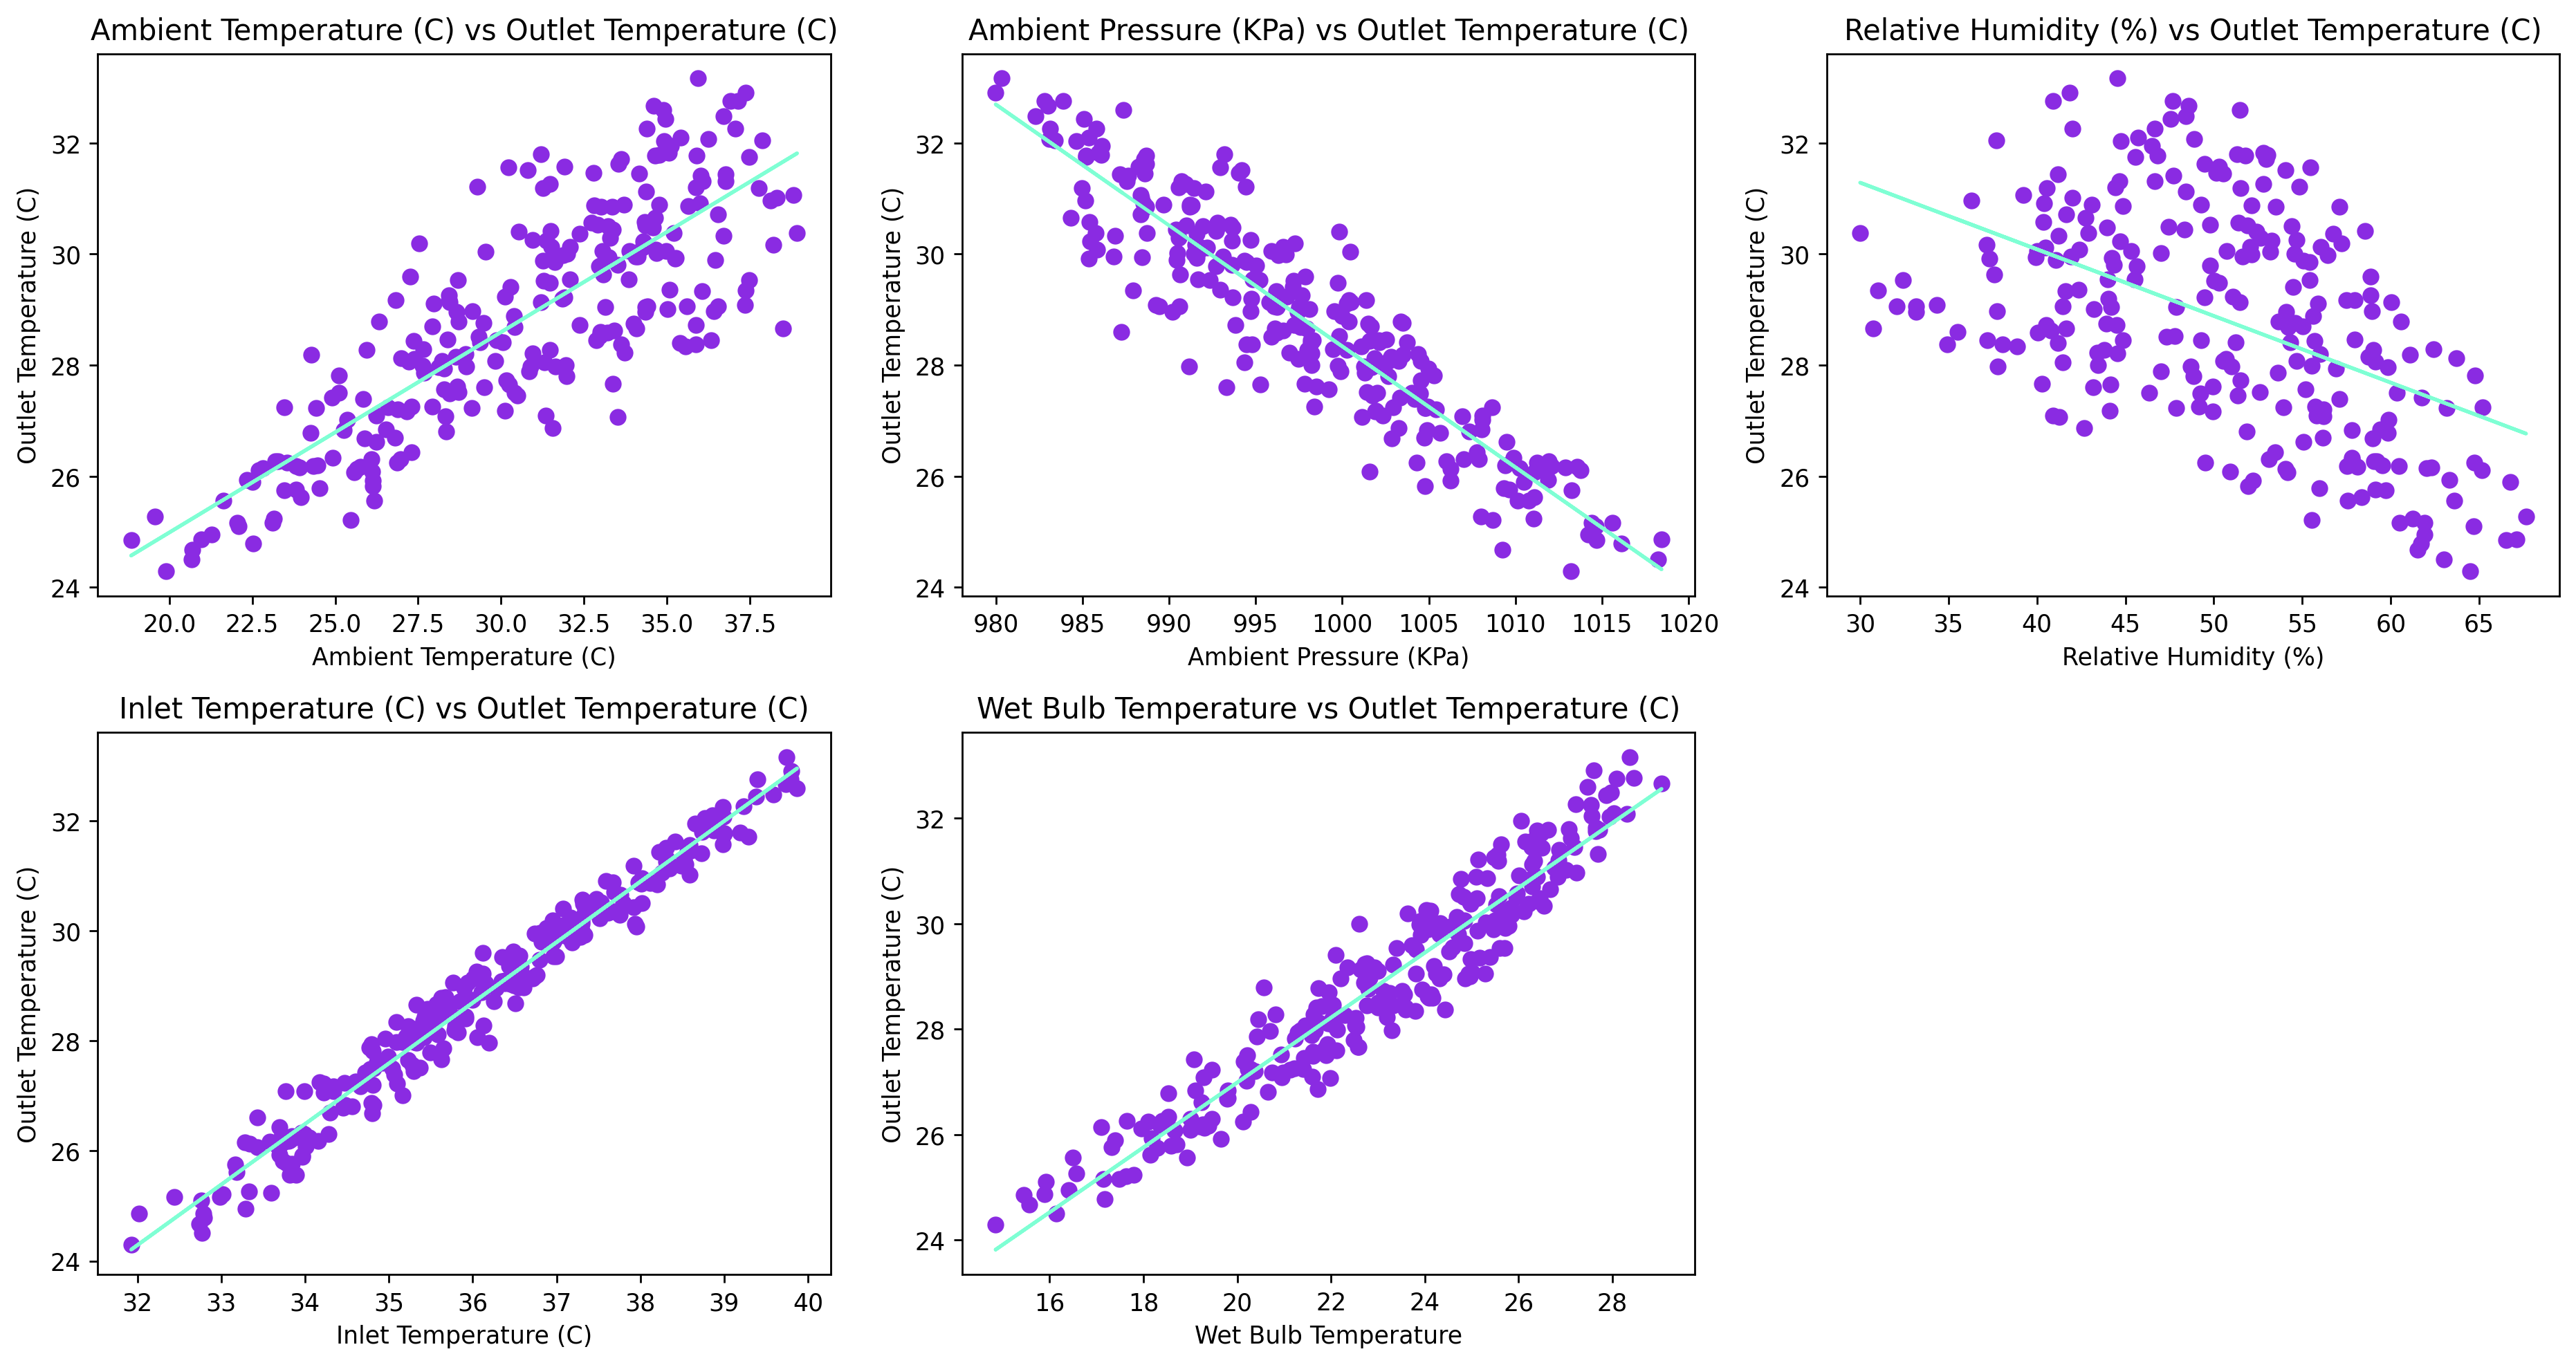

In [33]:
dddd=smoothed_data
columns_to_plot = dddd.columns[:-1]
num_plots = len(columns_to_plot)
num_cols = 3
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8),dpi=250)  # Creating subplots

for idx, cols in enumerate(columns_to_plot):
    row = idx // num_cols
    col = idx % num_cols
    dff = dddd.sort_values(by=cols)
    
    # Perform linear regression
    coefficients = np.polyfit(dddd[cols], dddd['t2'], 1)
    trend_line = np.poly1d(coefficients)
    
    # Plotting on the respective subplot
    axes[row, col].plot(dddd[cols], trend_line(dddd[cols]), color='aquamarine')
    axes[row, col].scatter(dff[cols], dff['t2'], color='blueviolet', marker='o')
    axes[row, col].set_title(f"{labels[cols]} vs {labels['t2']}")
    axes[row, col].set_xlabel(labels[cols])
    axes[row, col].set_ylabel(labels['t2'])
for i in range(num_plots, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()  # Adjusts spacing between subplots
plt.show()

In [34]:
import shap

In [35]:
data.columns[:-1]

Index(['at', 'ap', 'rh', 't1', 'tw'], dtype='object')

In [36]:
noise

array([[ 0.69202041, -0.51711757, -0.09169427,  0.1870865 , -0.40530439,
         0.6450121 ],
       [-0.25707678, -0.27004142, -0.14214879,  0.33346361, -0.33403178,
         0.24788164],
       [ 1.2918794 , -1.88724652, -2.64459993,  0.15800341, -0.00942106,
         0.5876082 ],
       [ 0.79513602,  2.03171423, -0.15678043, -0.65624852, -1.26778121,
         0.15603143],
       [ 0.73907208,  0.79893641, -1.27494223, -0.30232456,  0.02047217,
         0.71825298],
       [ 0.80661205, -1.5548747 , -0.85188289,  0.02777814, -0.49216286,
        -0.64599597],
       [ 1.6911753 , -0.63561907, -0.97484155,  0.64055621, -0.36118919,
        -0.66754852],
       [ 0.8604877 ,  0.06852386, -1.51776933, -0.57076036,  0.60181205,
        -0.64784188],
       [-0.45698106, -0.65226702,  0.36868604, -0.06877338,  0.24504426,
         0.01060037],
       [ 0.47349793, -2.3938194 , -0.48100628, -0.57807692,  0.057058  ,
         0.12441737],
       [-1.23871009,  1.51702384, -0.31204466,  0.

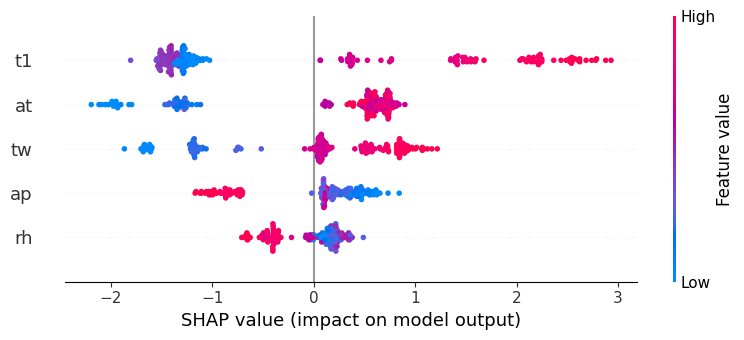

In [45]:
model=GradientBoostingRegressor()
model.fit(features_train,target_train)
explainer = shap.Explainer(model, features_train)
shap_values = explainer(features_train)
shap.summary_plot(shap_values, features_train, feature_names=data.columns[:-1])

In [38]:
features

at           ap         rh         t1    tw
0   18.000000  1022.800000  73.100000  31.210000  15.0
1   13.000000  1020.200000  77.000000  31.050000  11.0
2   19.000000  1022.400000  66.300000  32.090000  15.0
3   30.000000  1009.200000  51.100000  35.060000  23.0
4   41.000000   992.200000  22.300000  35.240000  25.0
5   40.000000   988.900000  34.500000  37.760000  27.0
6   34.830000   989.100000  50.460000  38.900000  26.0
7   33.820000   983.440000  50.700000  41.050000  30.0
8   38.580000   976.370000  39.890000  40.210000  28.0
9   36.270000   981.818687  57.030000  39.920000  29.0
10  32.293239   988.106824  35.057345  35.330699  24.0

In [39]:
shap.plots.partial_dependence('t1', shap_values, features_test)

TypeError: 'Explanation' object is not callable